# Lab 2
Ali Tejani, amt3639;
Caroline Yao, chy253

## Programming Questions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Correlations

#### Pandas

In [2]:
path = 'Data\DF1'
df=pd.read_csv(path,index_col=0,na_values='?')
df.head()

0         1         2         3
0  1.038502  0.899865  0.835053 -0.971528
1  0.320455 -0.647459  0.149079  0.352593
2  0.055480  2.234771  0.271672 -2.108739
3 -0.007260 -0.524299 -0.126550  0.670827
4 -1.237390 -1.377017 -1.049932  1.342079

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BFE87B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D224828>]], dtype=object)

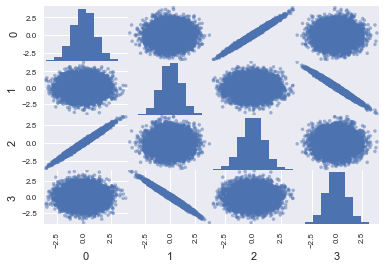

In [3]:
from pandas.plotting import scatter_matrix
# plot each column against each other using pandas
scatter_matrix(df)

#### Seaborn

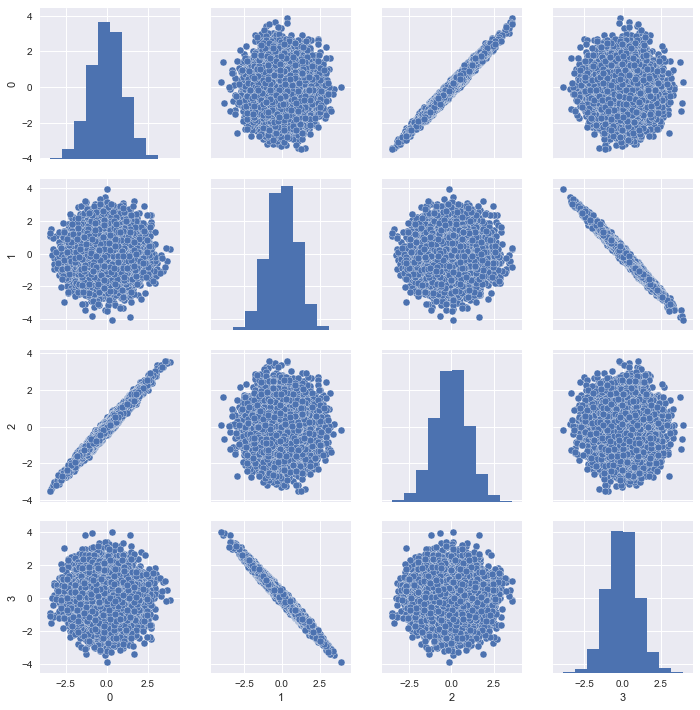

In [4]:
# plot each column against each other using seaborn
sns.pairplot(df)

#### Covariance Matrix

In [5]:
df.cov()

0         1         2         3
0  1.001558 -0.004012  0.991624  0.004125
1 -0.004012  1.005378 -0.004099 -0.995457
2  0.991624 -0.004099  1.001589  0.004081
3  0.004125 -0.995457  0.004081  1.005168

The covariance matrix is an n x n matrix where each element is cov($x_{i}$,$x_{j}$)

For example:
\begin{align}
\sigma^2 = \begin{pmatrix}
\sigma_1^2 & \sigma_{12}^2 \\
\sigma_{12}^2 & \sigma_2^2 
\end{pmatrix}.
\end{align}

Columns 0 and 1 have a low covariance magnitude, so their plot seems to have no relation. This is the case for 0 and 3, 1 and 2, and 2 and 3 as well.

Columns 0 and 2 have a high covariance, so their plot looks like a line with a positive slope.

Columns 1 and 3 have a high negative covariance, so their plot looks like a line with a negative slope.

#### Covariance vs Sample Size

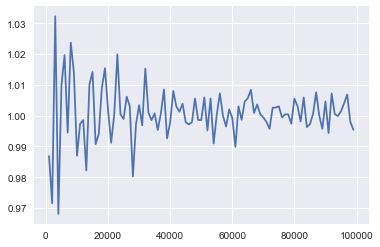

In [6]:
a = {}
for i in range(1000,100000,1000):
    # take i samples and get the covariance
    samples1 = np.random.multivariate_normal((0,0,0),((1,0,0),(0,1,1),(0,1,1)), i)
    a[i] = np.cov(samples1,rowvar=False)[1,2]
# plot the covariance against the number of samples
plt.plot(*zip(*sorted(a.items())))
plt.show()


As the number of samples increases, the calculated covariance approaces the true variance.

### 2. Outliers

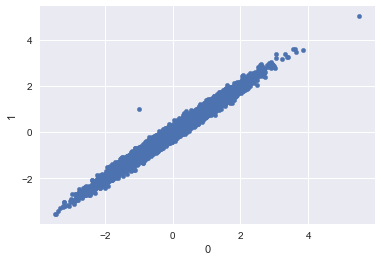

In [7]:
plt.clf()
path = 'Data\DF2'
df=pd.read_csv(path,index_col=0,na_values='?')
df.plot(x='0',y='1',kind='scatter')

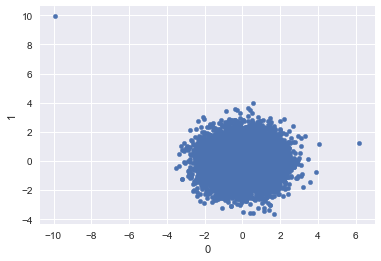

In [8]:
cov = df.cov()

from scipy.linalg import sqrtm
cov_inv = np.linalg.inv(sqrtm(cov))
data = pd.DataFrame(np.dot(df,cov_inv))

data.plot(x = 0, y = 1,kind='scatter')

\begin{array}{rcl}
\mathbf{C_z} & \triangleq & E\{(\mathbf{z}-\mathbf{\bar{z}})(\mathbf{z}-\mathbf{\bar{z}})^T\} \\
& = & E \Big\{ \Big[ (\mathbf{Q}\mathbf{y})-(\mathbf{Q}\mathbf{\bar{y}}) \Big] \Big[ (\mathbf{Q}\mathbf{y})-(\mathbf{Q}\mathbf{\bar{y}}) \Big] ^T \Big\} \\
& = & E \Big\{ \Big[ \mathbf{Q}(\mathbf{y}-\mathbf{\bar{y}}) \Big] \Big[ \mathbf{Q}(\mathbf{y}-\mathbf{\bar{y}}) \Big] ^T \Big\} \\
& = & E \Big\{ \mathbf{Q}(\mathbf{y}-\mathbf{\bar{y}}) (\mathbf{y}-\mathbf{\bar{y}})^T \mathbf{Q}^T \Big\} \\
& = & \mathbf{Q} E \Big\{ (\mathbf{y}-\mathbf{\bar{y}}) (\mathbf{y}-\mathbf{\bar{y}})^T  \Big\} \mathbf{Q}^T \\
& = & \mathbf{Q}\mathbf{C_y}\mathbf{Q}^T
\end{array}

If Cy is the identity matrix and Cz is know, then Q can be determined by taking the matrix square root of Cz. We then multiply points in Z by Q^-1, and we will obtain Y. Now the point (-1,1) is more outlying than (5.5,5).

### 3. Even More Standard Error

#### Constant n

In [9]:
a = []
for i in range(10000):
    # take samples of e and x
    eSamples = np.random.normal(0,1,150)
    xSamples = np.random.normal(0,1,150)
    # compute y
    ySamples = -3 + eSamples
    # calculate bHat using the equation from written problem 2
    bHat = np.dot(xSamples, ySamples)/np.dot(xSamples,xSamples)
    error = bHat - 0
    a.append(error)
#find the standard deviation of the errors
np.std(a)

0.25957849857841037

The value -0.15 is not significant since the standard deviation is greater than |-0.15|

#### Varying n

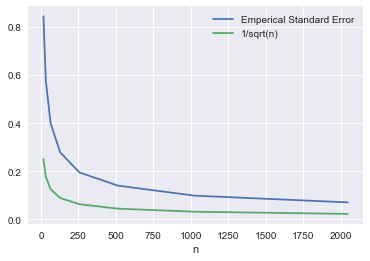

In [11]:
xAxis = [2**i for i in range(4,12)]
stdError = []
invSqrt = [1/np.sqrt(i) for i in xAxis]
for n in xAxis:
    errors = []
    # perform calculation from last step with varying n
    for i in range(10000):
        eSamples = np.random.normal(0,1,n)
        xSamples = np.random.normal(0,1,n)
        ySamples = -3 + eSamples

        bHat = np.dot(xSamples, ySamples)/np.dot(xSamples,xSamples)
        error = bHat - 0
        errors.append(error)
    stdError.append(np.std(errors))
    
# plot emperical error and 1/sqrt(n) against n
plt.plot(xAxis,stdError, label = 'Emperical Standard Error')
plt.plot(xAxis,invSqrt, label = '1/sqrt(n)')
plt.legend()
plt.xlabel('n')

The shape of the Emperical Standard Error matches the inverse square root of the number of samples

### 4. Names and Frequencies

In [13]:
# top k names for a given year
def topNames(k, year):
    if(not year in range(1880,2016)): 
        return None
    df=pd.read_csv('Names\yob{}.txt'.format(year),header=None,na_values='?')
    df.sort_values(2,ascending=False)
    return(df[0][:k])
topNames(10, 2000)

0        Emily
1       Hannah
2      Madison
3       Ashley
4        Sarah
5       Alexis
6     Samantha
7      Jessica
8    Elizabeth
9       Taylor
Name: 0, dtype: object

In [14]:
# name frequency from 1880 to 2015 based on gender
def nameFreq(name):
    names = {'M':0,'F':0}
    for year in range(1880,2016):
        df=pd.read_csv('Names\yob{}.txt'.format(year),header=None,na_values='?')
        # find all the males named name, and count them
        males = df.loc[df[0] == name].loc[df[1] == 'M'][2].get_values()
        females = df.loc[df[0] == name].loc[df[1] == 'F'][2].get_values()
        if(males.size != 0):
            names['M'] += males[0]
        if(females.size != 0):
            names['F'] += females[0]
    return names
nameFreq('Ali')

{'F': 9501, 'M': 23614}

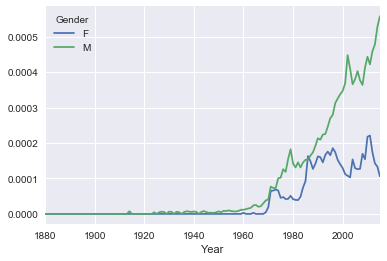

In [201]:
# relative name frequency from 1880 to 2015 based on gender
def relativeNameFreq(name):
    # combine all files into one dataframe
    dataFrames = []
    for year in range(1880,2016):
        df=pd.read_csv('Names\yob{}.txt'.format(year),names=['Name', 'Gender', 'Freq'])
        df['Year']=pd.Series(year,index=df.index)
        dataFrames.append(df)
    df = pd.concat(dataFrames)
    # get the total names in a year
    totalNames = df.pivot_table(values='Freq',index='Year',columns='Gender',aggfunc=np.sum)
    # get the number of people named name in a year
    totalGivenName = df.loc[df['Name']==name].pivot_table(values='Freq',index='Year',columns='Gender',aggfunc=np.sum)
    # get the fraction of people named name in a year
    relativeFreq = totalGivenName.div(totalNames).fillna(0)
    # plot
    return relativeFreq
relativeNameFreq('Ali').plot()

In [202]:
# find all names that changed in gender popularity from 1880 to 2015
def nameGenderSwitch():
    # combine all files into one dataframe
    dataFrames = []
    for year in range(1880,2016):
        df=pd.read_csv('Names\yob{}.txt'.format(year),names=['Name', 'Gender', 'Freq'])
        df['Year']=pd.Series(year,index=df.index)
        dataFrames.append(df)
    df = pd.concat(dataFrames)
    # get the number of people named a name in a year
    totalNames = df.pivot_table(values='Freq',index=['Name','Year'],columns='Gender',aggfunc=np.sum).fillna(0)
    totalNames['M-F'] = np.sign(totalNames['M']-totalNames['F'])
    totalNames = totalNames['M-F']
    index = totalNames.axes[0]
    ret = {'MToF': 0, 'FToM':0}
    for a in set(index.get_level_values(0)):
        if totalNames[a].is_monotonic_increasing and len(totalNames[a].unique()) > 1:
            ret['FToM'] += 1
            # if m < f then m > f
#             print "{} was a female name until {}, and now is a male name".format(a,totalNames[a][totalNames[a] != -1].index[0])
        elif totalNames[a].is_monotonic_decreasing and len(totalNames[a].unique()) > 1:
            ret['MToF'] += 1
            # if f < m then m < f
#             print "{} was a male name until {}, and now is a female name".format(a,totalNames[a][totalNames[a] != 1].index[0])
    return ret
nameGenderSwitch()

{'FToM': 756, 'MToF': 609}

Examples:

Niger was a female name until 1994, and now is a male name

Chesleigh was a male name until 2010, and now is a female name

Chade was a male name until 1985, and now is a female name

### 5. Visualization Tools and Missing/Hidden Values

In [209]:
tweets = pd.read_csv('tweets.csv')
tweets['user_location'].head()

0        Wheeling WV
1                NaN
2                NaN
3             global
4    California, USA
Name: user_location, dtype: object

In [213]:
def get_state(row):
    state = []
    text = row['user_location'].lower()
    
    if "west virginia" in text or r"\bwv\b" in text or "Wheeling" in text:
        state.append("WV")
    if "texas" in text or r"\btx\b" in text or "austin" in text or "houston" in text:
        state.append("TX")
    if "new york" in text or r"\bny\b" in text or "new york city" in text:
        state.append("NY")
    return ",".join(state)

tweets['user_location'] = tweets['user_location'].astype(str)
tweets['state'] = tweets.apply(get_state,axis=1)
tweets['state'].value_counts()

         226352
TX         6285
NY         4592
WV          249
TX,NY         2
Name: state, dtype: int64

We can find the number of states by searching for certain terms in the user_location field. We can assign more states with more strict criteria and checking for more states/cities.